In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
import shutil
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
with_maskImage = os.listdir('F:\AIUB\Spring 21-22\CVPR\mask_data\data\with_mask')
without_maskImage = os.listdir('F:\AIUB\Spring 21-22\CVPR\mask_data\data\without_mask')

In [3]:
print(len(with_maskImage))
print(len(without_maskImage))

3725
3828


In [4]:
os.mkdir('./train')
os.mkdir('./train/with_mask')
os.mkdir('./val')
os.mkdir('./val/with_mask')
os.mkdir('./test')
os.mkdir('./test/with_mask')

s
os.mkdir('./train/without_mask')
os.mkdir('./val/without_mask')
os.mkdir('./test/without_mask')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: './train'

In [5]:
with_mask_train_len = int(np.round(0.6 * len(with_maskImage), 0))
with_mask_val_len = int(np.round(0.7 * len(with_maskImage), 0))


for i in range(with_mask_train_len):
    shutil.copy(os.path.join('F:\AIUB\Spring 21-22\CVPR\mask_data\data\with_mask', with_maskImage[i]), './train/with_mask')

for i in range(with_mask_train_len, with_mask_val_len):
    shutil.copy(os.path.join('F:\AIUB\Spring 21-22\CVPR\mask_data\data\with_mask', with_maskImage[i]), './val/with_mask')

for i in range(with_mask_val_len, len(with_maskImage)):
    shutil.copy(os.path.join('F:\AIUB\Spring 21-22\CVPR\mask_data\data\with_mask', with_maskImage[i]), './test/with_mask')
    

without_mask_train_len = int(np.round(0.6 * len(without_maskImage), 0))
without_mask_val_len = int(np.round(0.7 * len(without_maskImage), 0))



for i in range(without_mask_train_len):
    shutil.copy(os.path.join('F:\AIUB\Spring 21-22\CVPR\mask_data\data\without_mask', without_maskImage[i]), './train/without_mask')

for i in range(without_mask_train_len, without_mask_val_len):
    shutil.copy(os.path.join('F:\AIUB\Spring 21-22\CVPR\mask_data\data\without_mask', without_maskImage[i]), './val/without_mask')

for i in range(without_mask_val_len, len(without_maskImage)):
    shutil.copy(os.path.join('F:\AIUB\Spring 21-22\CVPR\mask_data\data\without_mask', without_maskImage[i]), './test/without_mask')

In [6]:
PATH_TRAIN_MASK = './train/with_mask'
PATH_VAL_MASK = './val/with_mask'
PATH_TEST_MASK = './test/with_mask'

PATH_TRAIN_NO_MASK = './train/without_mask'
PATH_VAL_NO_MASK = './val/without_mask'
PATH_TEST_NO_MASK = './test/without_mask'

PATH_TRAIN = './train'
PATH_VAL = './val'
PATH_TEST = './test'

In [7]:
print(len(os.listdir(PATH_TRAIN_MASK)))
print(len(os.listdir(PATH_VAL_MASK)))
print(len(os.listdir(PATH_TEST_MASK)))

2235
373
1117


In [8]:
print(len(os.listdir(PATH_TRAIN_NO_MASK)))
print(len(os.listdir(PATH_VAL_NO_MASK)))
print(len(os.listdir(PATH_TEST_NO_MASK)))

2297
383
1148


In [9]:
train_mask_files = os.listdir(PATH_TRAIN_MASK)
train_no_mask_files = os.listdir(PATH_TRAIN_NO_MASK)

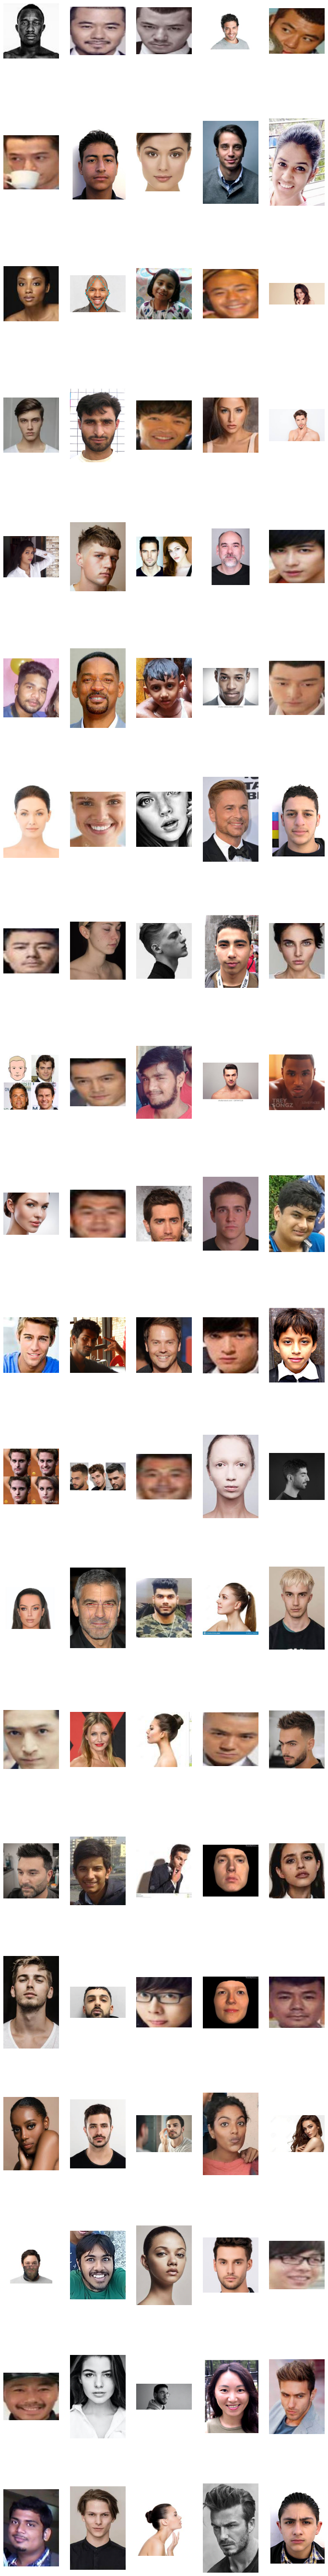

In [10]:
rows=20 #rows in subplots
cols=5 #columns in subplots

fig,ax = plt.subplots(rows,cols,figsize=(12,100))
r = 0
c = 0
for i in range(rows*cols):
    aa = plt.imread(os.path.join(PATH_TRAIN_NO_MASK,train_no_mask_files[i]))
    ax[r,c].axis("off")
    ax[r,c].imshow(aa)
    c+=1
    if c == cols:
        c=0
        r+=1
plt.show()

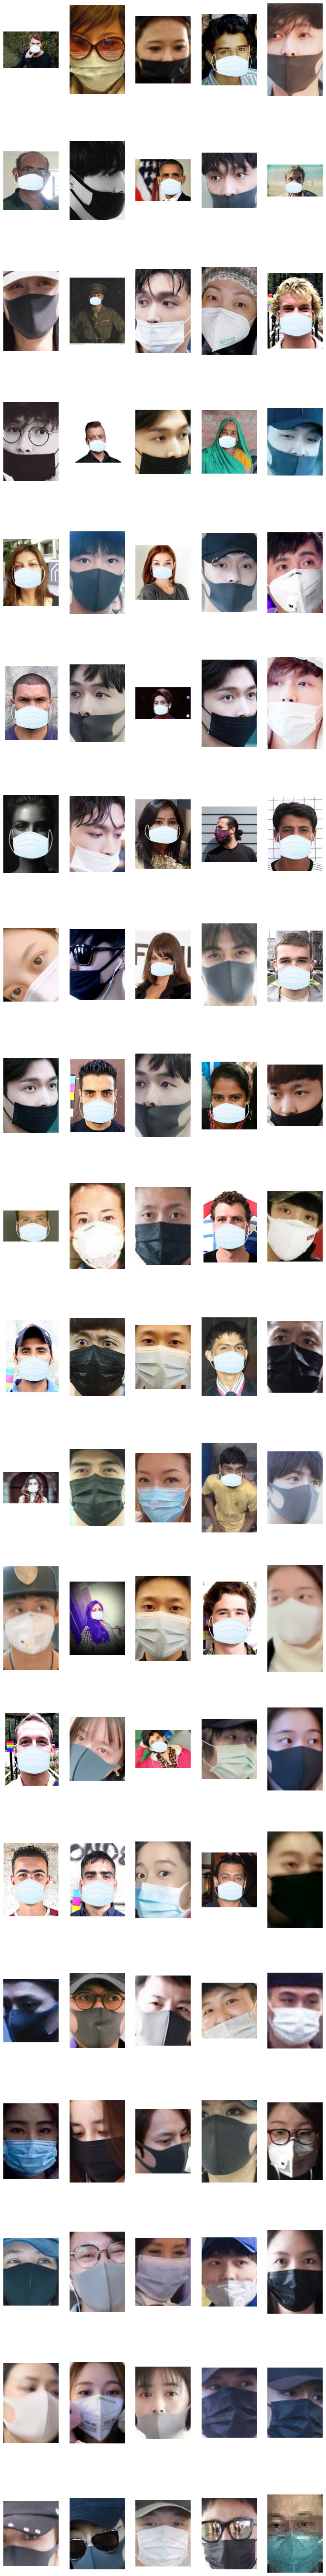

In [11]:
rows=20 #rows in subplots
cols=5 #columns in subplots

fig,ax = plt.subplots(rows,cols,figsize=(12,100))
r = 0
c = 0
for i in range(rows*cols):
    aa = plt.imread(os.path.join(PATH_TRAIN_MASK,train_mask_files[i]))
    ax[r,c].axis("off")
    ax[r,c].imshow(aa)
    c+=1
    if c == cols:
        c=0
        r+=1
plt.show()

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

train_data_gen = ImageDataGenerator(rotation_range=30,
                                    width_shift_range=0.02,
                                    height_shift_range=0.02,
                                    zoom_range=[0.8,1.2],
                                    horizontal_flip=True,
                                    rescale=1/255
                                   )

val_data_gen = ImageDataGenerator(rescale=1/255)
test_data_gen = ImageDataGenerator(rescale=1/255)

In [13]:
training_data = train_data_gen.flow_from_directory(PATH_TRAIN, target_size=(200, 200), color_mode='rgb', class_mode='binary', batch_size=32)
val_data = val_data_gen.flow_from_directory(PATH_VAL, target_size=(200, 200), color_mode='rgb', class_mode='binary', batch_size=32)
test_data = test_data_gen.flow_from_directory(PATH_TEST, target_size=(200, 200), color_mode='rgb', class_mode='binary', batch_size=32)

Found 4532 images belonging to 2 classes.
Found 756 images belonging to 2 classes.
Found 2265 images belonging to 2 classes.


In [14]:
training_data.class_indices

{'with_mask': 0, 'without_mask': 1}

In [15]:
training_data.image_shape

(200, 200, 3)

In [16]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=3, strides=1, activation='relu', input_shape=training_data.image_shape))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same'))


model.add(Conv2D(filters=128, kernel_size=3, strides=1, activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Conv2D(filters=256, kernel_size=3, strides=1, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Conv2D(filters=512, kernel_size=3, strides=1, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same'))


model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
early_stop = EarlyStopping(monitor='val_loss', patience=4, mode='min')

In [18]:
history = model.fit(training_data, batch_size=32, epochs=10, validation_data=val_data, callbacks=early_stop)

Epoch 1/10
142/142 [==============================] - 566s 4s/step - loss: 0.5915 - accuracy: 0.6682 - val_loss: 0.2285 - val_accuracy: 0.9087
Epoch 2/10
142/142 [==============================] - 561s 4s/step - loss: 0.2632 - accuracy: 0.9019 - val_loss: 0.2997 - val_accuracy: 0.8743
Epoch 3/10
142/142 [==============================] - 562s 4s/step - loss: 0.2632 - accuracy: 0.9020 - val_loss: 0.1896 - val_accuracy: 0.9193
Epoch 4/10
142/142 [==============================] - 562s 4s/step - loss: 0.2399 - accuracy: 0.9087 - val_loss: 0.2975 - val_accuracy: 0.8915
Epoch 5/10
142/142 [==============================] - 560s 4s/step - loss: 0.2024 - accuracy: 0.9282 - val_loss: 0.3401 - val_accuracy: 0.8585
Epoch 6/10
142/142 [==============================] - 561s 4s/step - loss: 0.2028 - accuracy: 0.9275 - val_loss: 0.1455 - val_accuracy: 0.9524
Epoch 7/10
142/142 [==============================] - 560s 4s/step - loss: 0.1700 - accuracy: 0.9400 - val_loss: 0.2180 - val_accuracy: 0.9153

In [19]:
loss_df = pd.DataFrame(history.history)
loss_df

loss  accuracy  val_loss  val_accuracy
0  0.441665  0.785746  0.228491      0.908730
1  0.269655  0.904016  0.299704      0.874339
2  0.245653  0.908870  0.189591      0.919312
3  0.224747  0.918358  0.297455      0.891534
4  0.207711  0.925419  0.340071      0.858466
5  0.206319  0.925640  0.145509      0.952381
6  0.190675  0.931156  0.217966      0.915344
7  0.183955  0.935128  0.155897      0.945767
8  0.164559  0.940865  0.182384      0.931217
9  0.160785  0.942410  0.156441      0.953704

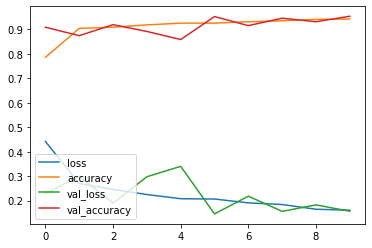

In [20]:
loss_df.plot()
plt.legend(loc=3)